In [4]:
import sys
sys.path.append('../')

import sys; sys.path.insert(0, '../../') ## make sure path to root of project directory
from wu_barcodes.config import *
from data.wu_data import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import methods.ax_methods as ax_methods
mpl.rcParams.update(mpl_configs)
import numpy as np; rnd = np.random.default_rng()
import scipy.stats

In [5]:
import methods.filter_lineages as fl

import scipy.ndimage.filters as ndif
def running_mean_uniform_filter1d(x, N):
    return ndif.uniform_filter1d(x, N, mode='reflect', origin=0)

def tradeoff_statistic(E1_lfcs, E2_lfcs, E1_f0, E2_f0, f0_weighting='min'):
    fold_change_weights = E1_lfcs * E2_lfcs
    if f0_weighting == 'min':
        f0_weights = np.min([np.mean(E1_f0, axis=0), np.mean(E2_f0, axis=0)],axis=0)
    elif f0_weighting == 'mean':
        f0_weights = np.mean([np.mean(E1_f0, axis=0), np.mean(E2_f0, axis=0)],axis=0)
    elif f0_weighting == 'harmonic':
        f0_weights = np.mean([np.mean(E1_f0, axis=0)**-1., np.mean(E2_f0, axis=0)**-1.],axis=0)**-1.
    elif f0_weighting == 'none':
        f0_weights = 1

    tradeoff_statistic = (fold_change_weights * f0_weights)
    return tradeoff_statistic

/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt


11233
BWH2 Both 1152
[ 3687 52421 85133 33946 11256 15033 73699 35613  3826 84112]
BWH2 HF 1942
[34786 44985 44269 78598 18229 53404 33561 60990 49752 77165]
BWH2 LF 1627
[71882 48708 87888 32200 39123  8414 66170 19243 37771 65605]


/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt


2682
Bovatus Both 261
[104786 106974  28612 104761  39504  64863 104770  16122 106855  79191]
Bovatus HF 640
[70961 99907 53977 96269 36635 10793 48687 77317 51309 77277]
Bovatus LF 534
[ 31363  62842 101288  72434 105242  75289  34706 107779  29637 100205]


/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt


6340
BtVPI Both 1111
[112710   6352  77606  79957  66046  60492 138437  48695  86546  39825]
BtVPI HF 1011
[ 18041  93219  57412  12386  71512  71567  21031  36393 129136 131441]
BtVPI LF 2029
[129757  10763  28706  44338 138786   4497  45057  18511   2468  75617]


/Users/daniel/Documents/GoodLab/wu_barcodes_clean/jupyter/biorxiv_plot_scripts/../../methods/filter_lineages.py:282: RuntimeWarning: divide by zero encountered in log
  return np.log( freqs1/freqs0 ) / dt


728
Bt7330 Both 11
[23226 12466 26706 20848 21542   810 40227 20856 31721 12780]
Bt7330 HF 13
[42230 14595 41020 23875 24329 32741 11954 20672 40216  3050]
Bt7330 LF 559
[44080 17458 10686  1215 51985 36760 17453 11447 54437 12556]


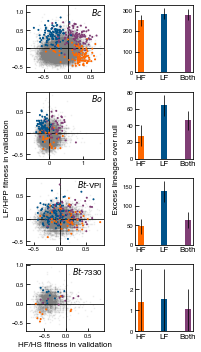

In [39]:
HF_discovery = [6, 7, 8]
LF_discovery = [16, 18]
HF_validate = [9, 10]
LF_validate = [19]

# HF_discovery = [6, 7, 8, 11, 12]
# LF_discovery = [16, 18, 1, 2]
# HF_validate = [13, 15, 9, 10]
# LF_validate = [19, 3, 5]

# HF_discovery = [6, 7, 8, 9, 10]
# LF_discovery = [16, 18, 19]
# HF_validate = [11, 12, 13, 15]
# LF_validate = [1, 2, 3, 5]

# LF_discovery = [6, 7, 8, 9]
# HF_discovery = [1, 2, 3]
# LF_validate = [10]
# HF_validate = [5]

t0, t1 = 4, 10
f0_weighting = 'none'
min_reads = 5
cutoff = 10**-6.5


fig  = plt.figure(figsize=(3, 6))
outer = mpl.gridspec.GridSpec(nrows=7, ncols=3, figure=fig,
                              height_ratios=[1,0.05,1,0.05,1,0.05,1],
                              width_ratios=[1,0.15,0.75])

all_scatter_ax = fig.add_subplot( outer[:, 0] )
all_scatter_ax.set_xlabel('HF/HS fitness in validation', labelpad=3, fontsize=8)
all_scatter_ax.set_ylabel('LF/HPP fitness in validation', fontsize=8, labelpad=5)
ax_methods.turn_off_ax(all_scatter_ax)

bac_strong_tradeoff_indices = {bac:{} for bac in bacteria}

for b, (bac, n) in enumerate(zip(bacteria, [100, 100, 100, 100])):
    ax = fig.add_subplot(outer[b*2, :])
    ax_methods.turn_off_ax(ax)
    # ax.set_ylabel(BAC_FORMAL_NAMES[bac], fontsize=10, labelpad=20)
    
    if 'bac read library':
        row_ids = fl.bac_row_ids[bac]
        notWu = fl.bac_nonwu_indices[bac]
        read_array = fl.bac_read_arrays[bac][:, notWu]
        freq_array = np.einsum('ij, i->ij', read_array, read_array.sum(axis=1)**-1.)
        depth_array = read_array.sum(axis=1)
        day0_freqs = freq_array[0]
        #lineage_bool = day0_freqs > 10**-6.5
        # lineage_indices = np.where( day0_freqs > 1e-6 )[0]

        HF_ids = [ [row_ids[(mouse, day)] for mouse in HF_discovery + HF_validate] for day in [t0, t1] ]
        LF_ids = [ [row_ids[(mouse, day)] for mouse in LF_discovery + LF_validate] for day in [t0, t1] ]
        lineage_bool = day0_freqs > 10**-6.5

    if 'collect freqs':
        HF_d_reads0, HF_d_reads1, = fl.get_read_arrays(bac, HF_discovery, t0, t1, split_day0=None)
        LF_d_reads0, LF_d_reads1, = fl.get_read_arrays(bac, LF_discovery, t0, t1, split_day0=None)
        HF_v_reads0, HF_v_reads1 = fl.get_read_arrays(bac, HF_validate, t0, t1, split_day0=None)
        LF_v_reads0, LF_v_reads1,= fl.get_read_arrays(bac, LF_validate, t0, t1, split_day0=None)

        HF_d_f0, HF_d_f1 = HF_d_reads0 / HF_d_reads0.sum(), HF_d_reads1 / HF_d_reads1.sum()
        LF_d_f0, LF_d_f1 = LF_d_reads0 / LF_d_reads0.sum(), LF_d_reads1 / LF_d_reads1.sum()
        HF_v_f0, HF_v_f1 = HF_v_reads0 / HF_v_reads0.sum(), HF_v_reads1 / HF_v_reads1.sum()
        LF_v_f0, LF_v_f1 = LF_v_reads0 / LF_v_reads0.sum(), LF_v_reads1 / LF_v_reads1.sum()

        HF_maxfreqs = np.max([HF_d_f0, HF_d_f1], axis=0)
        LF_maxfreqs = np.max([LF_d_f0, LF_d_f1], axis=0)

        HF_valid = fl.filter_lineages(HF_v_reads0, HF_v_reads1, min_reads=min_reads, threshold=HF_maxfreqs)
        LF_valid = fl.filter_lineages(LF_v_reads0, LF_v_reads1, min_reads=min_reads, threshold=LF_maxfreqs)

        union_valid = (HF_valid*LF_valid)*lineage_bool

    if "calculate fitnesses":
        HF_discovery_avg = fl.calc_lfc_array(HF_d_f0, HF_d_f1, t1-t0)
        LF_discovery_avg = fl.calc_lfc_array(LF_d_f0, LF_d_f1, t1-t0)

        HF_validate_lfcs = fl.calc_lfc_array(HF_v_f0, HF_v_f1, t1-t0)
        LF_validate_lfcs = fl.calc_lfc_array(LF_v_f0, LF_v_f1, t1-t0)

        valid_discovery = (~HF_discovery_avg.mask)*(~LF_discovery_avg.mask)
        valid_validate = (~HF_validate_lfcs.mask)*(~LF_validate_lfcs.mask)
        viable_lineages = valid_discovery * valid_validate * union_valid #* HF_valid * LF_valid

        lineage_indices = np.arange(lineage_bool.shape[0])[viable_lineages]
        print(viable_lineages.sum())

    if 'tradeoff statistics':
        tradeoff_stats = tradeoff_statistic(HF_discovery_avg, LF_discovery_avg, HF_d_f0, LF_d_f0, f0_weighting=f0_weighting)

        quadrant_statistics_dict = {}
        quadrant_lineages_dict = {}
        fitHF = ((HF_discovery_avg > 0) * (LF_discovery_avg < 0))[viable_lineages]
        fitLF = ((HF_discovery_avg < 0) * (LF_discovery_avg > 0))[viable_lineages]
        fitBOTH = ((HF_discovery_avg > 0) * (LF_discovery_avg > 0))[viable_lineages]

        fitHF_stats = tradeoff_stats[viable_lineages][fitHF]
        fitLF_stats = tradeoff_stats[viable_lineages][fitLF]
        fitBOTH_stats = tradeoff_stats[viable_lineages][fitBOTH]

        fitHF_sorting = np.argsort(fitHF_stats)
        fitLF_sorting = np.argsort(fitLF_stats)
        fitBOTH_sorting = np.argsort(fitBOTH_stats)[::-1]

        quadrant_lineages_dict['HF'] = lineage_indices[fitHF][fitHF_sorting]
        quadrant_lineages_dict['LF'] = lineage_indices[fitLF][fitLF_sorting]
        quadrant_lineages_dict['Both'] = lineage_indices[fitBOTH][fitBOTH_sorting]

        quadrant_statistics_dict['HF'] = fitHF_stats[fitHF_sorting]
        quadrant_statistics_dict['LF'] = fitLF_stats[fitLF_sorting]
        quadrant_statistics_dict['Both'] = fitBOTH_stats[fitBOTH_sorting]

    # if "validation empirical quadrants":
    #     quadrant_probabilities = {}
    #     FIT_quadrant_prob = ((HF_validate_lfcs > 0)*(LF_validate_lfcs > 0))[viable_lineages].sum() / viable_lineages.sum()
    #     HF_quadrant_prob = ((HF_validate_lfcs > 0)*(LF_validate_lfcs < 0))[viable_lineages].sum() / viable_lineages.sum()
    #     LF_quadrant_prob = ((HF_validate_lfcs < 0)*(LF_validate_lfcs > 0))[viable_lineages].sum() / viable_lineages.sum()
    #     UNFIT_quadrant_prob = ((HF_validate_lfcs < 0)*(LF_validate_lfcs < 0))[viable_lineages].sum() / viable_lineages.sum()
    #     quadrant_probabilities['HF'] = HF_quadrant_prob
    #     quadrant_probabilities['LF'] = LF_quadrant_prob
    #     quadrant_probabilities['Both'] = FIT_quadrant_prob
    #     print(bac, quadrant_probabilities)
    #
    # if "validation empirical quadrants":
    #     # HF_fit_bool = (HF_validate_lfcs > 0)[viable_lineages]
    #     # LF_fit_bool = (LF_validate_lfcs > 0)[viable_lineages]
    #     # LF_if_HF = (LF_validate_lfcs[viable_lineages] > 0)[HF_fit_bool].sum() / HF_fit_bool.sum()
    #     # HF_if_LF = (HF_validate_lfcs[viable_lineages]> 0)[LF_fit_bool].sum() / LF_fit_bool.sum()
    #     #
    #     # HF_discovery_bool = (HF_discovery_avg > 0)[viable_lineages]
    #     # LF_discovery_bool = (LF_discovery_avg > 0)[viable_lineages]
    #     # HF_if_discovery = ((HF_validate_lfcs[viable_lineages]> 0)[HF_discovery_bool]).sum() / HF_discovery_bool.sum()
    #     # LF_if_discovery = ((LF_validate_lfcs[viable_lineages]> 0)[LF_discovery_bool]).sum() / LF_discovery_bool.sum()
    #     #
    #     # LF_if_NOTdiscovery = ((LF_validate_lfcs[viable_lineages] > 0)[~HF_discovery_bool]).sum() / (~HF_discovery_bool).sum()
    #     # HF_if_NOTdiscovery = ((HF_validate_lfcs[viable_lineages] > 0)[~LF_discovery_bool]).sum() / (~LF_discovery_bool).sum()
    #     #
    #     # conditional_probs = {'HF': np.max( [(1-LF_if_HF)*HF_if_discovery, (1-LF_if_HF)*HF_if_NOTdiscovery] ),
    #     #                      'LF': np.max( [(1-HF_if_LF)*LF_if_discovery, (1-HF_if_LF)*LF_if_NOTdiscovery] ),
    #     #                      'Both': np.max( [HF_if_LF*LF_if_discovery, LF_if_HF*HF_if_discovery] )}
    #
    #     HF_discovery_fit = (HF_discovery_avg > 0)[viable_lineages]
    #     LF_discovery_fit = (LF_discovery_avg > 0)[viable_lineages]
    #
    #     HF_valid_fit = HF_validate_lfcs[viable_lineages] > 0
    #     LF_valid_fit = LF_validate_lfcs[viable_lineages] > 0
    #
    #     HF_notLF_HFdiscovery = (HF_valid_fit * (~LF_valid_fit))[HF_discovery_fit].sum() / (HF_discovery_fit).sum()
    #     HF_notLF_LFdiscovery =  (HF_valid_fit * (~LF_valid_fit))[(~LF_discovery_fit)].sum() / (~LF_discovery_fit).sum()
    #
    #     LF_notHF_HFdiscovery = (LF_valid_fit * (~HF_valid_fit))[(~HF_discovery_fit)].sum() / (~HF_discovery_fit).sum()
    #     LF_notHF_LFdiscovery =  (LF_valid_fit * (~HF_valid_fit))[LF_discovery_fit].sum() / (LF_discovery_fit).sum()
    #
    #     BOTH_HFdiscovery = (HF_valid_fit * LF_valid_fit)[HF_discovery_fit].sum() / (HF_discovery_fit).sum()
    #     BOTH_LFdiscovery =  (HF_valid_fit * LF_valid_fit)[LF_discovery_fit].sum() / (LF_discovery_fit).sum()
    #
    #     conditional_HF_notLF_counts = (HF_valid_fit * (~LF_valid_fit))[HF_discovery_fit].sum()
    #     conditional_HF_LF_counts = (HF_valid_fit * (LF_valid_fit))[HF_discovery_fit].sum()
    #
    #     conditional_LF_notHF_counts = (LF_valid_fit * (~HF_valid_fit))[LF_discovery_fit].sum()
    #     conditional_LF_HF_counts = (HF_valid_fit * (LF_valid_fit))[LF_discovery_fit].sum()
    #
    #     conditional_counts = {'HF': (conditional_HF_notLF_counts, HF_discovery_fit.sum()),
    #                           'LF': (conditional_LF_notHF_counts, LF_discovery_fit.sum()),
    #                           'Both': (conditional_HF_LF_counts, HF_discovery_fit.sum())}
    #     #
    #     # conditional_counts = {'HF': (conditional_HF_notLF_counts, HF_discovery_fit.sum()),
    #     #                       'LF': (conditional_LF_notHF_counts, LF_discovery_fit.sum()),
    #     #                       'Both': (conditional_LF_HF_counts, LF_discovery_fit.sum())}
    #
    #     conditional_probs = {'HF': np.max( [HF_notLF_HFdiscovery, HF_notLF_LFdiscovery] ),
    #                          'LF': np.max( [LF_notHF_HFdiscovery, LF_notHF_LFdiscovery] ),
    #                          'Both': np.max( [BOTH_HFdiscovery, BOTH_LFdiscovery] )}
    if 'set up axes':
        scatter_ax = fig.add_subplot(outer[b*2,0])
        bar_ax = fig.add_subplot(outer[b*2,2])
        scatter_ax.scatter(HF_validate_lfcs, LF_validate_lfcs, s=0.5, color='grey', alpha=0.1, rasterized=True, zorder=0)
        scatter_ax.axhline(0, color='black', zorder=0)
        scatter_ax.axvline(0, color='black', zorder=0)
        # scatter_ax.set_xlabel('HF/HS fitness (validation)', labelpad=3, fontsize=8)
        # scatter_ax.set_ylabel('LF/HPP fitness (validation)', fontsize=8)

        scatter_x, scatter_y, scatter_colors = [], [], []
        bar_dict = {}
        tradeoff_colors = {'HF':DIET_COLORS['HF'], 'LF':DIET_COLORS['LF'], 'Both':DIET_COLORS['HLH']}
        tradeoff_signs = {'HF':(1,-1), 'LF':(-1,1), 'Both': (1,1)}

    for i, tradeoff in enumerate(['Both', 'HF', 'LF']):
        tradeoff_stats = quadrant_statistics_dict[tradeoff]
        tradeoff_indices = quadrant_lineages_dict[tradeoff]

        print(bac, tradeoff, len(tradeoff_indices))

        HF_v_tradeoff_lfcs = HF_validate_lfcs[tradeoff_indices]
        LF_v_tradeoff_lfcs = LF_validate_lfcs[tradeoff_indices]
        signs = tradeoff_signs[tradeoff]

        bac_strong_tradeoff_indices[bac][tradeoff] = [j for i, j in enumerate(tradeoff_indices) if True]#(HF_v_tradeoff_lfcs[i]*signs[0] > 0)*(LF_v_tradeoff_lfcs[i]*signs[1] > 0)]

        if 'Both':
            print(tradeoff_indices[:10])

        observed_consistent = ((HF_v_tradeoff_lfcs[:]*signs[0] > 0)*(LF_v_tradeoff_lfcs[:]*signs[1] > 0))
        num_samples = HF_v_tradeoff_lfcs.shape[-1]
        # num_samples = n

        if tradeoff in ['HF', 'Both']:
            subset = HF_discovery_avg[viable_lineages] > 0
        elif tradeoff in ['LF']:
            subset = LF_discovery_avg[viable_lineages] > 0

        null_consistent_lst = []
        for j in range(1000):
            permutation = rnd.permutation(np.arange(subset.sum()))[:num_samples]
            HF_v_sub = HF_validate_lfcs[viable_lineages][subset][permutation]
            LF_v_sub = LF_validate_lfcs[viable_lineages][subset][permutation]
            null_consistent = ((HF_v_sub*signs[0] > 0)*(LF_v_sub*signs[1] > 0)).sum()
            null_consistent_lst.append(null_consistent)
        bar_dict[tradeoff] = (null_consistent_lst, observed_consistent.sum())

        # try:
        #     n = np.min( [np.where( np.abs(tradeoff_stats) > 0.05)[0][-1], 100, observed_consistent.sum() - null_consistent] )
        # except:
        #     n = 10

        n = np.max( [np.min((int(bar_dict[tradeoff][1] - np.mean(bar_dict[tradeoff][0])), 100)), 10] )
        # if n > len(tradeoff_indices):
        #     n = np.min( [np.where( np.abs(tradeoff_stats) > 0.0)[0][-1], 100] )
        scatter_x.extend( list(HF_v_tradeoff_lfcs[:n]) )
        scatter_y.extend( list(LF_v_tradeoff_lfcs[:n]) )
        scatter_colors.extend( [tradeoff_colors[tradeoff]]*n )

    permutation = rnd.permutation( np.arange(len(scatter_colors)) )
    x = np.array(scatter_x)[permutation]
    y = np.array(scatter_y)[permutation]
    colors = np.array(scatter_colors)[permutation]
    scatter_ax.scatter(x, y, color=colors, s=1)
    scatter_ax.text(0.99, 0.85, BAC_FORMAL_NAMES[bac], fontsize=8, transform=scatter_ax.transAxes,
                    horizontalalignment='right')


    bar_order = ['HF', 'LF', 'Both']
    bar_colors = [tradeoff_colors[tradeoff] for tradeoff in bar_order]

    for c, (tradeoff, color) in enumerate(zip(bar_order, bar_colors)):
        observed_excess = bar_dict[tradeoff][1] - np.array(bar_dict[tradeoff][0])
        per25 = np.percentile(observed_excess, 2.5)
        per75 = np.percentile(observed_excess, 97.5)
        mean = np.mean(observed_excess)
        err_bar = np.array([(mean-per25, per75-mean)]).transpose()

        if mean < 0:
            pass
        else:
            bar_ax.bar(c, mean, yerr=err_bar, width=0.25, color=color)

        # bar_ax.bar(np.arange(3), np.array(observed_bars)-np.array(null_bars), width=0.25, color=bar_colors)
        bar_ax.set_xticks([0, 1, 2])
        bar_ax.xaxis.set_tick_params(width=0)
    bar_ax.set_ylim(0, bar_ax.get_ylim()[1])
    bar_ax.set_xticklabels(bar_order, fontsize=8)
    if b == 2:
        bar_ax.set_ylabel('\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tExcess lineages over null', labelpad=3, fontsize=8)

# all_bar_ax = fig.add_subplot( outer[:, 2] )
# ax_methods.turn_off_ax(all_bar_ax)
# all_bar_ax.set_ylabel('Excess lineages over null', fontsize=8, labelpad=5)

    # bar_colors = [tradeoff_colors[tradeoff] for tradeoff in bar_order]
    # null_bars = [bar_dict[tradeoff][0] for tradeoff in bar_order]
    # observed_bars = [bar_dict[tradeoff][1] for tradeoff in bar_order]
    #
    # bar_ax.bar(np.arange(3)-0.15, observed_bars, width=0.25, color=bar_colors)
    # bar_ax.bar(np.arange(3)+0.15, null_bars, width=0.25, color=bar_colors, alpha=0.3)
    # # bar_ax.bar(np.arange(3), np.array(observed_bars)-np.array(null_bars), width=0.25, color=bar_colors)
    # bar_ax.set_xticks([0, 1, 2])
    # bar_ax.set_xticklabels(bar_order, fontsize=10)
    # bar_ax.set_ylabel('num. lineages')

fig.savefig(f'{biorxiv}/SI_tradeoffs_all_bac_fixed_diet.pdf')